# Additional Analysis for Blog
### Alex Bass
### 15 August 2022

In [82]:
import pandas as pd
import numpy as np
import pymc3 as pm
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("/Users/alex/Library/CloudStorage/OneDrive-Personal/DS6040/Project - School Shootings/") # setting project directory

In [83]:
data = pd.read_csv("webscraping/data_w_county_match_manual.csv")
data["Date"] = pd.to_datetime(data.Date.values) # converting values to DateTime
data.head()

,Unnamed: 0,X,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,...,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,countyFIPS,CountyName,population,School.1,City.1,State.1
0,1,600,20081023ALPRP,http://www.wsfa.com/story/9234390/wsfa-12-news...,NaN,NaN,2,2008-10-23,Fall,Prattville Christian Academy,...,No,No,1,NaN,1001,Autauga County,55869.0,Prattville Christian Academy,Prattville,AL
1,2,1979,20220319ALCEL,https://www.al.com/news/2022/03/robertsdale-po...,5,Regional,4,2022-03-19,Spring,Central Baldwin Middle School,...,No,No,99,No,1003,Baldwin County,223234.0,Central Baldwin Middle School,Loxley,AL
2,3,140,20190322ALBLB,http://www.wbrc.com/2019/03/22/bloutsville-ele...,NaN,NaN,4,2019-03-22,Spring,Blountsville Elementary School,...,No,No,1,No,1009,Blount County,57826.0,Blountsville Elementary School,Blountsville,AL
3,4,679,20060831ALOXO,https://www.newspapers.com/image/106551825/?te...,NaN,NaN,2,2006-08-31,Summer,Oxford High School,...,No,No,<10,NaN,1015,Calhoun County,113605.0,Oxford High School,Oxford,AL
4,5,1418,19781017ALLAL,https://www.newspapers.com/newspage/107532734/,NaN,NaN,2,1978-10-17,Fall,Lanett Junior High School,...,No,No,2,NaN,1017,Chambers County,33254.0,Lanett Junior High School,Lanett,AL


In [84]:
data.columns

Index(['Unnamed: 0', 'X', 'Incident_ID', 'Sources', 'Number_News',
       'Media_Attention', 'Reliability', 'Date', 'Quarter', 'School', 'City',
       'State', 'School_Level', 'Location', 'Location_Type', 'During_School',
       'Time_Period', 'First_Shot', 'Summary', 'Narrative', 'Situation',
       'Targets', 'Accomplice', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Preplanned',
       'Shots_Fired', 'Active_Shooter_FBI', 'countyFIPS', 'CountyName',
       'population', 'School.1', 'City.1', 'State.1'],
      dtype='object')

In [86]:
data["Year"] = data.Date.dt.year

In [87]:
plot_dta_1 = data.Year.value_counts().sort_index()
data.School_Level.value_counts()

#recoding school variable
old = ["High", "Elementary", "Middle", "Junior High", "K-8", "Other", "K-12", "12-Jun", "Unknown"]
new = ["High", "Elementary", "Middle", "Middle", "Elementary", "Other", "Other", "High", "Other"]
lvls = ['Elementary', "Middle", "High", "Other"]
data["School_Level"] = pd.Categorical(data.School_Level.replace(old, new), lvls, ordered=True)

plot_dta_2 = data.groupby(["Year", "School_Level"]).size()\
    .reset_index()\
    .rename(columns={0:'N'})\
    .query('School_Level!="Other"')

plot_dta_2['School_Level'] = plot_dta_2.School_Level.cat.remove_unused_categories()


Text(0.5, 1.0, 'Reported Number of Gun Violence Incidents\n in Schools has increased')

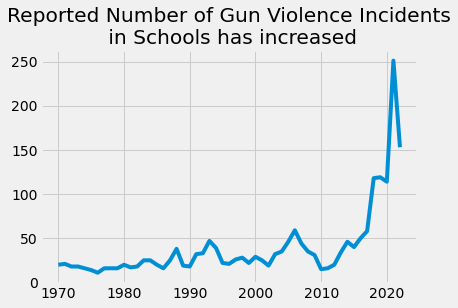

In [89]:
plt.style.use('fivethirtyeight')
sns.lineplot(x = plot_dta_1.index, y = plot_dta_1.values)
plt.title('Reported Number of Gun Violence Incidents\n in Schools has Increased')

Text(0.5, 1.0, 'Reported Number of Gun Violence Incidents\n in Schools has Increased')

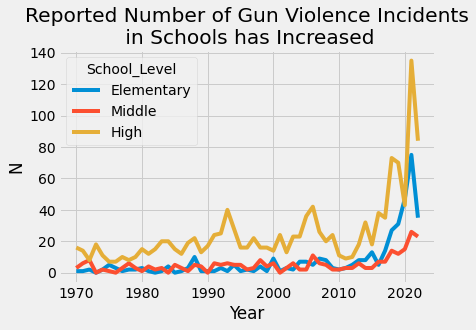

In [91]:
plt.style.use('fivethirtyeight')
sns.lineplot(x = plot_dta_2.Year, y = plot_dta_2.N, hue=plot_dta_2.School_Level)
plt.title('Reported Number of Gun Violence Incidents\n in Schools has Increased')

In [123]:
#some excel and messy data cleaning
plot_dta_3 = data.Shots_Fired.str.replace("<|>|\+", "")\
    .str.replace("Multiple", "3")\
    .str.replace("30-50", "40")\
    .str.replace("10-May", "7")\
    .str.replace("10-May", "7")\
    .str.replace("30-Oct", "20")\
    .str.replace("21-23", "22").fillna(1).astype('int')
    
#pretty right skewed so adding cap
plot_dta_3 = np.where(plot_dta_3>50, 50, plot_dta_3)

/var/folders/3n/g1rn_qsj40dd1cm5v67yyt100000gn/T/ipykernel_95421/2279823852.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_dta_3 = data.Shots_Fired.str.replace("<|>|\+", "")\


Text(0.8, -0.04, '*Missing values were give a 1')

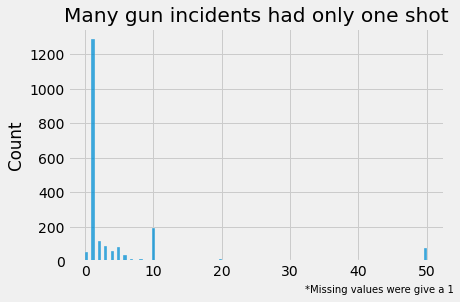

In [140]:
plt.style.use('fivethirtyeight')
sns.histplot(plot_dta_3)
plt.title('Many gun incidents had only one shot')
txt="*Missing values were give a 1"
plt.figtext(0.8, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=10)